### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read results

In [2]:
categories = ["food", "vehicle", "clothing", "sports_equipment", "person", "tool", "kitchenware", "furniture"]
lama_fid = []
deepfill_fid = []
lama_lpips = []
deepfill_lpips = []
lama_ssim = []
deepfill_ssim = []
lama_metrics = {}
deepfill_metrics = {}
for category in categories:
    lama_result = pd.read_csv(f'./results/lama/{category}.csv', sep='\t')
    deepfill_result = pd.read_csv(f'./results/deepfillv2/{category}.csv', sep='\t')
    
    lama_fid.append(float(lama_result["fid"][-1:].item()))
    deepfill_fid.append(float(deepfill_result["fid"][-1:].item()))
    
    lama_lpips.append(float(lama_result["lpips"][-1:].item()))
    deepfill_lpips.append(float(deepfill_result["lpips"][-1:].item()))
    
    lama_ssim.append(float(lama_result["ssim"][-1:].item()))
    deepfill_ssim.append(float(deepfill_result["ssim"][-1:].item()))

    
lama_metrics["categories"] = categories
lama_metrics["fid"] = lama_fid
lama_metrics["lpips"] = lama_lpips
lama_metrics["ssim"] = lama_ssim

deepfill_metrics["categories"] = categories
deepfill_metrics["fid"] = deepfill_fid
deepfill_metrics["lpips"] = deepfill_lpips
deepfill_metrics["ssim"] = deepfill_ssim

### LPIPS

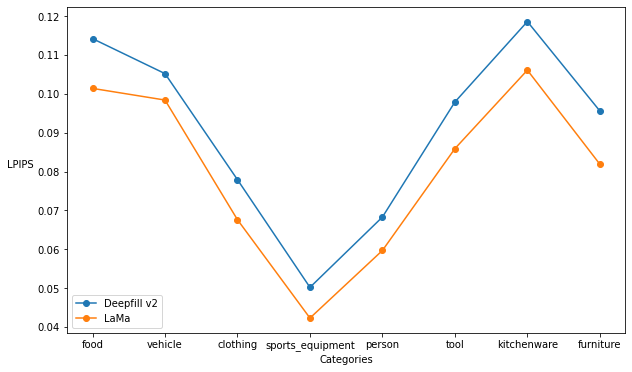

In [3]:
plt.figure(figsize=(10,6))
plt.plot(deepfill_metrics["categories"], deepfill_metrics["lpips"], marker="o", label="Deepfill v2")
plt.plot(lama_metrics["categories"] , lama_metrics["lpips"] , marker="o", label="LaMa")

plt.xlabel("Categories")
plt.ylabel("LPIPS", rotation='horizontal', ha='right')
plt.legend()
plt.show()

### FID

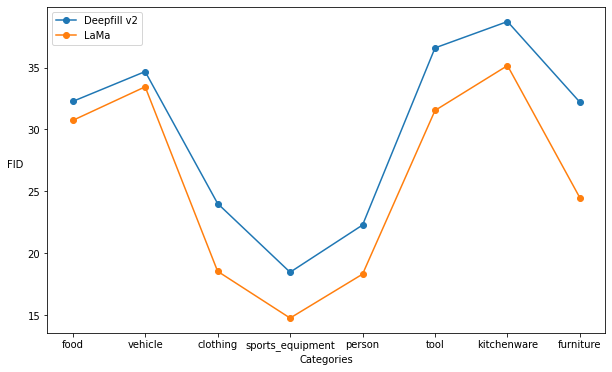

In [4]:
plt.figure(figsize=(10,6))
plt.plot(deepfill_metrics["categories"], deepfill_metrics["fid"], marker="o", label="Deepfill v2")
plt.plot(lama_metrics["categories"] , lama_metrics["fid"] , marker="o", label="LaMa")

plt.xlabel("Categories")
plt.ylabel("FID", rotation='horizontal', ha='right')
plt.legend()
plt.show()

### SSIM

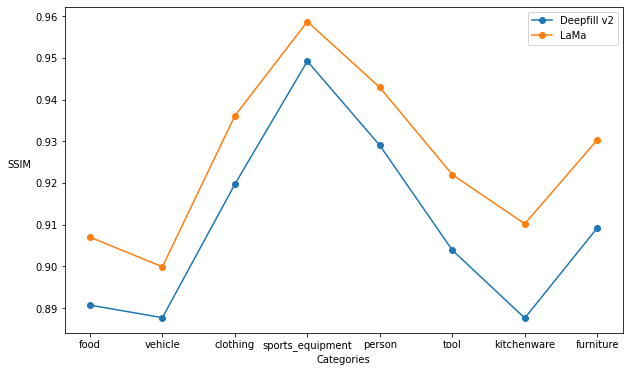

In [5]:
plt.figure(figsize=(10,6))
plt.plot(deepfill_metrics["categories"], deepfill_metrics["ssim"], marker="o", label="Deepfill v2")
plt.plot(lama_metrics["categories"] , lama_metrics["ssim"] , marker="o", label="LaMa")

plt.xlabel("Categories")
plt.ylabel("SSIM", rotation='horizontal', ha='right')
plt.legend()
plt.savefig("ssim.png", bbox_inches='tight')
plt.show()